In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
#Use printmd instead of print
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [88]:
import os
from pathlib import Path
import sys
sys.path.insert(0, str(Path(Path.cwd()).resolve().parents[0]))

from utils.report_generator import ReportGenerator

In [89]:
model_path = '/data6/plankton_test_db_new/model/20191023/00:51:01/'
csv_fname = '/data6/phytoplankton-db/csv/hab_in_vitro_summer2019-predictions.csv'
json_fname = '/data6/plankton_test_db_new/predictions_20191023120949.json'
# report = ReportGenerator(csv_fname=csv_fname, model_path=model_path)
report = ReportGenerator(json_fname=json_fname, model_path=model_path)


*********************************** Akashiwo ***********************************


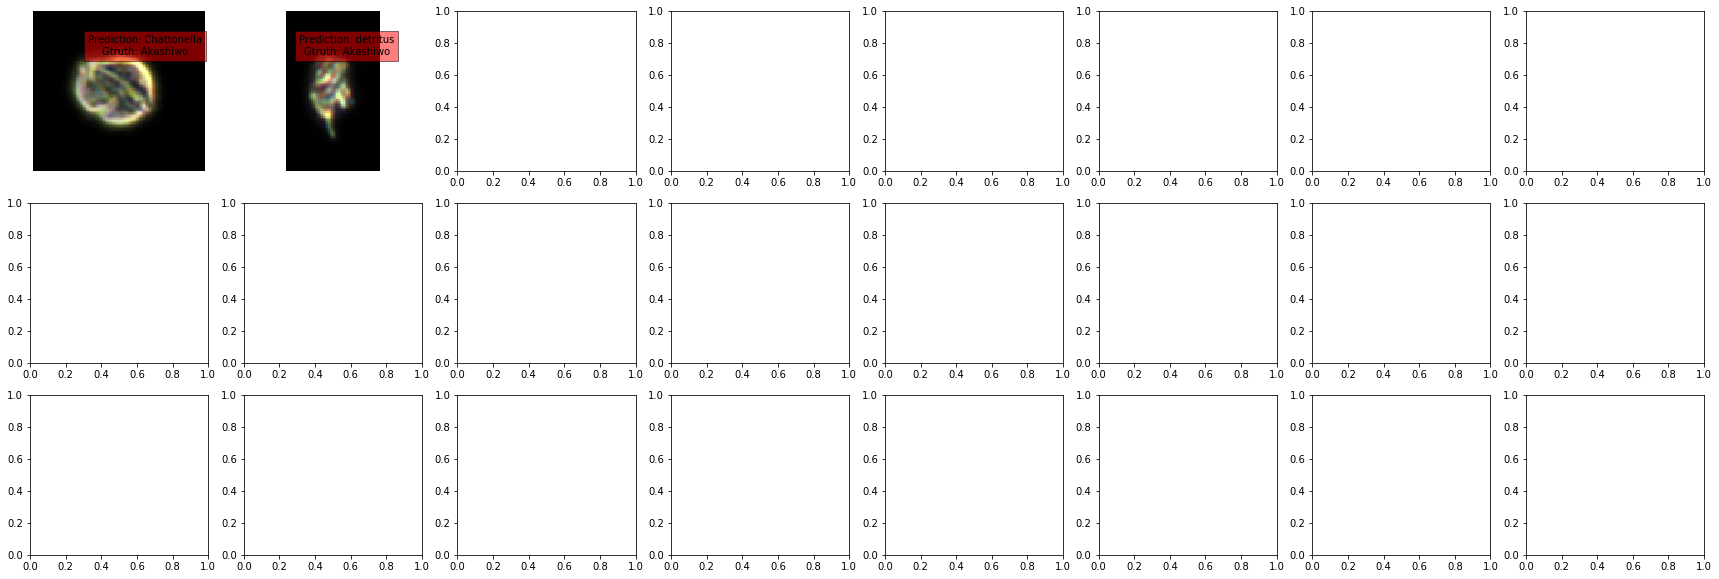


*********************************** Ciliates ***********************************


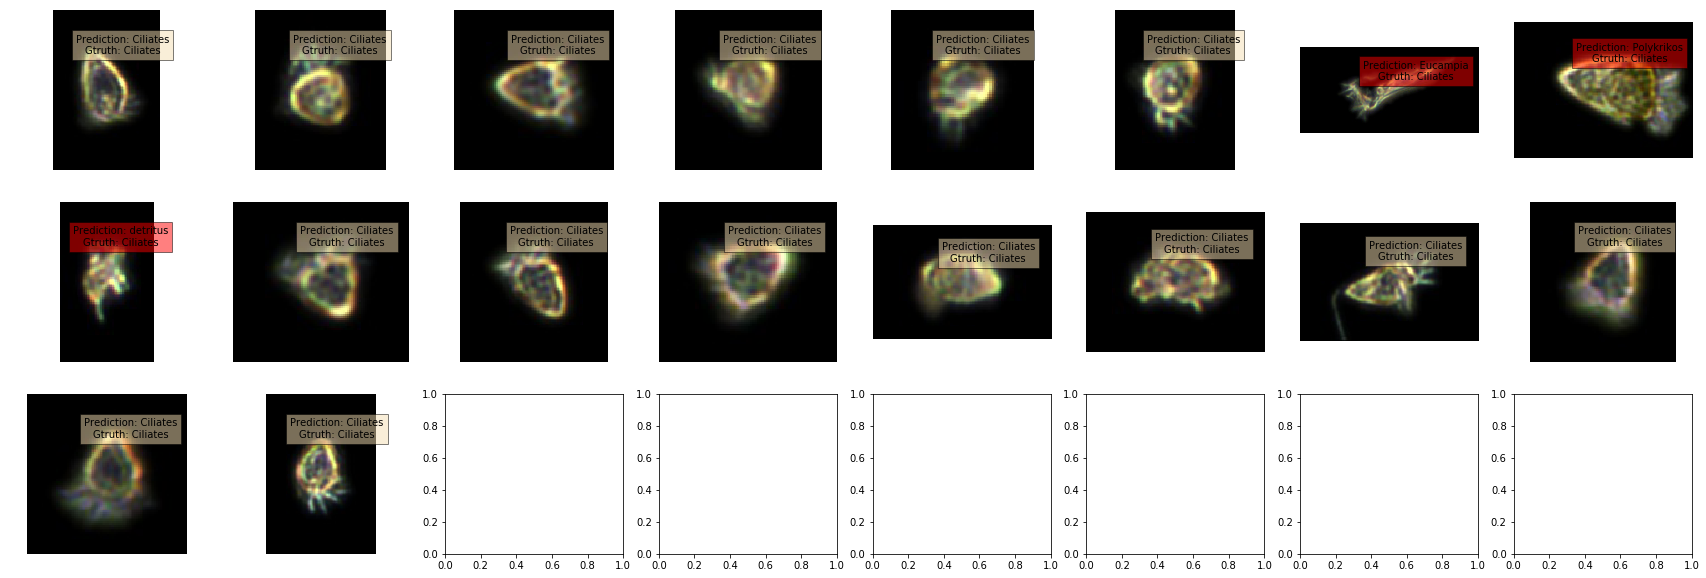


********************************* Cochlodinium *********************************


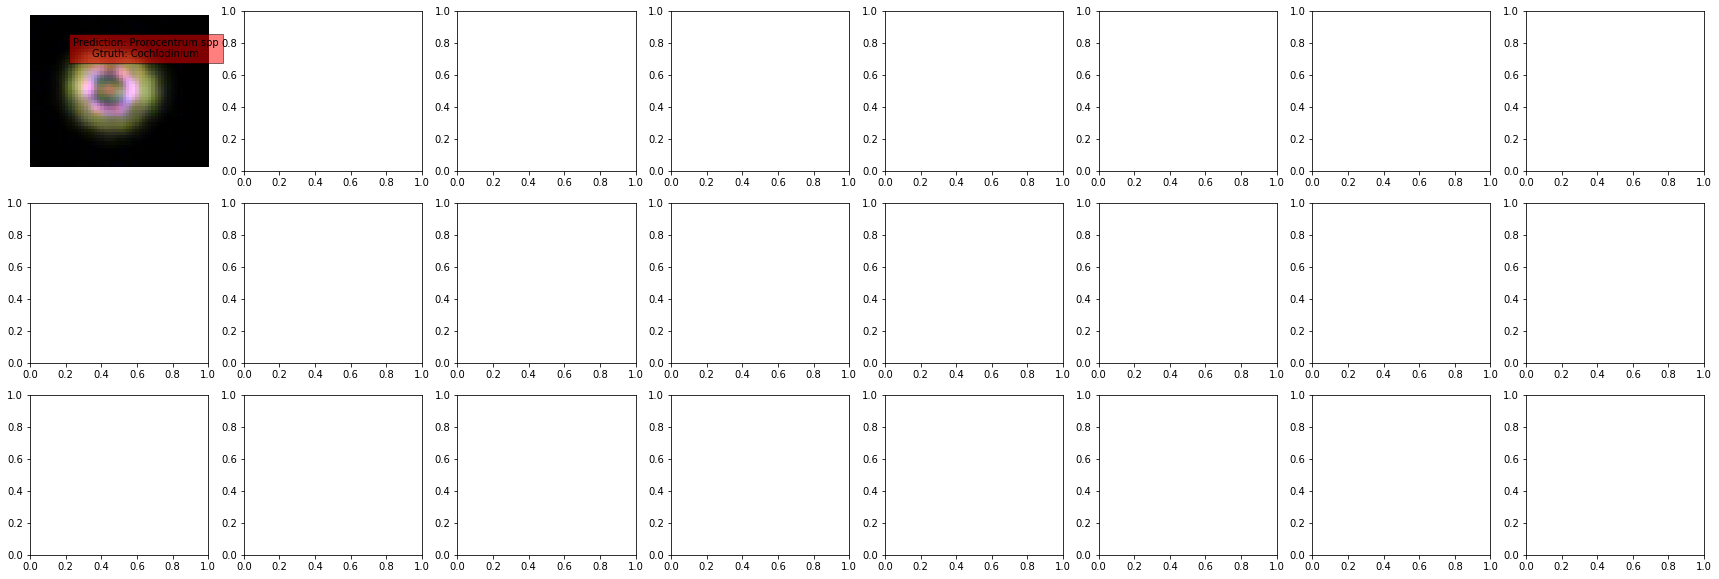


********************************** Gyrodinium **********************************


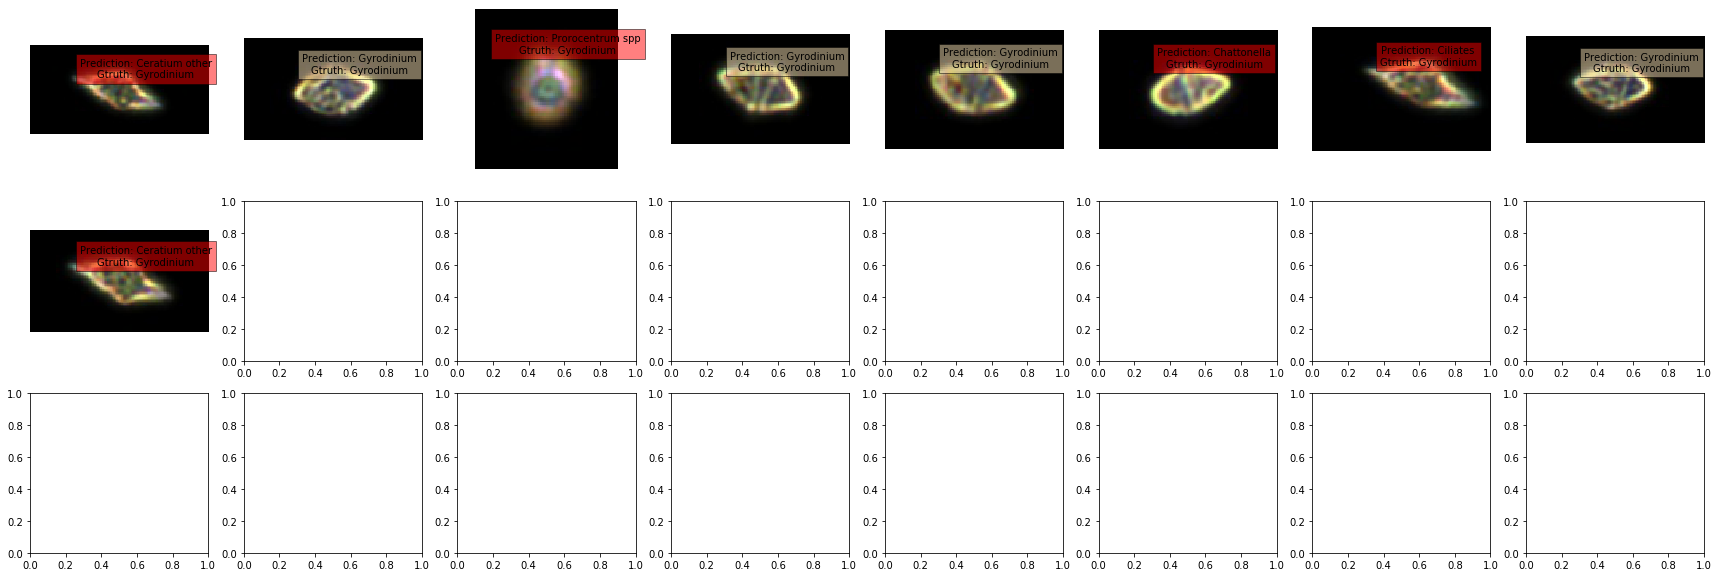


********************************** Polykrikos **********************************


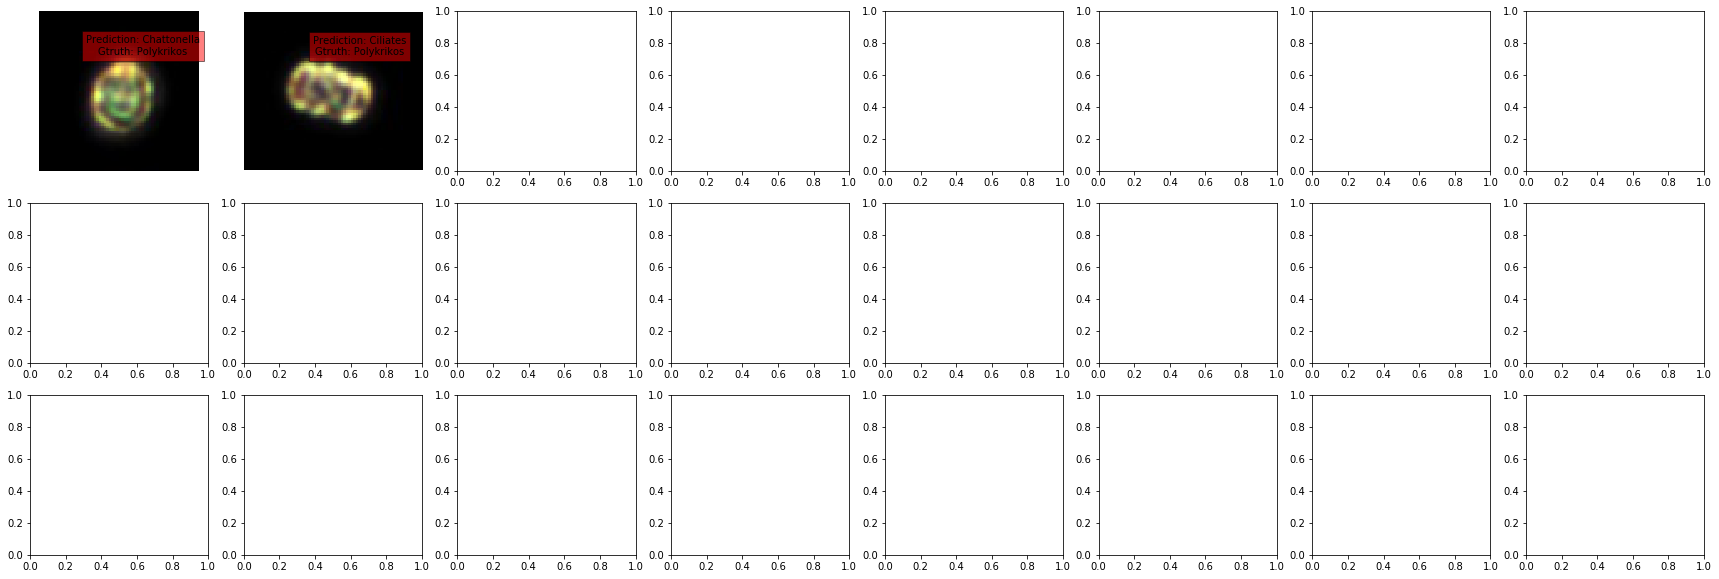


***************************** Prorocentrum michans *****************************


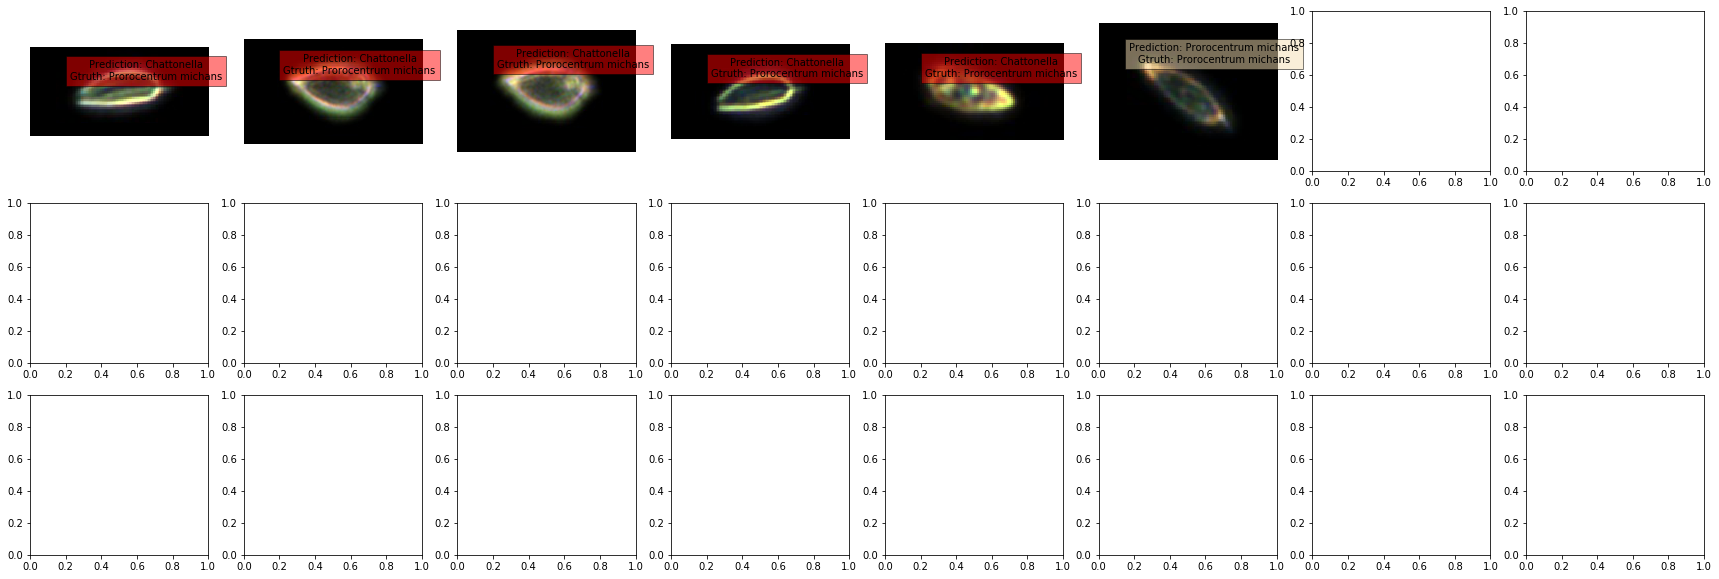


******************************* Prorocentrum spp *******************************


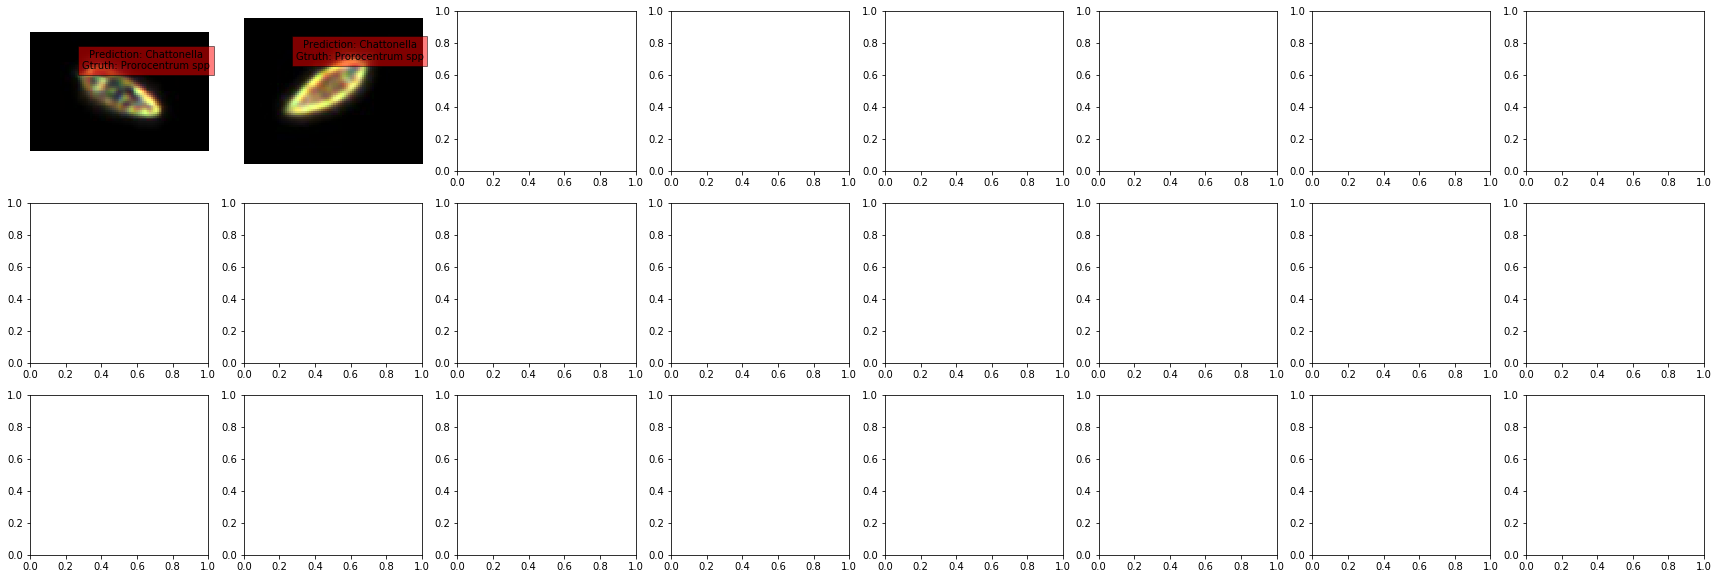


**************************** Pseudo-nitzschia chain ****************************


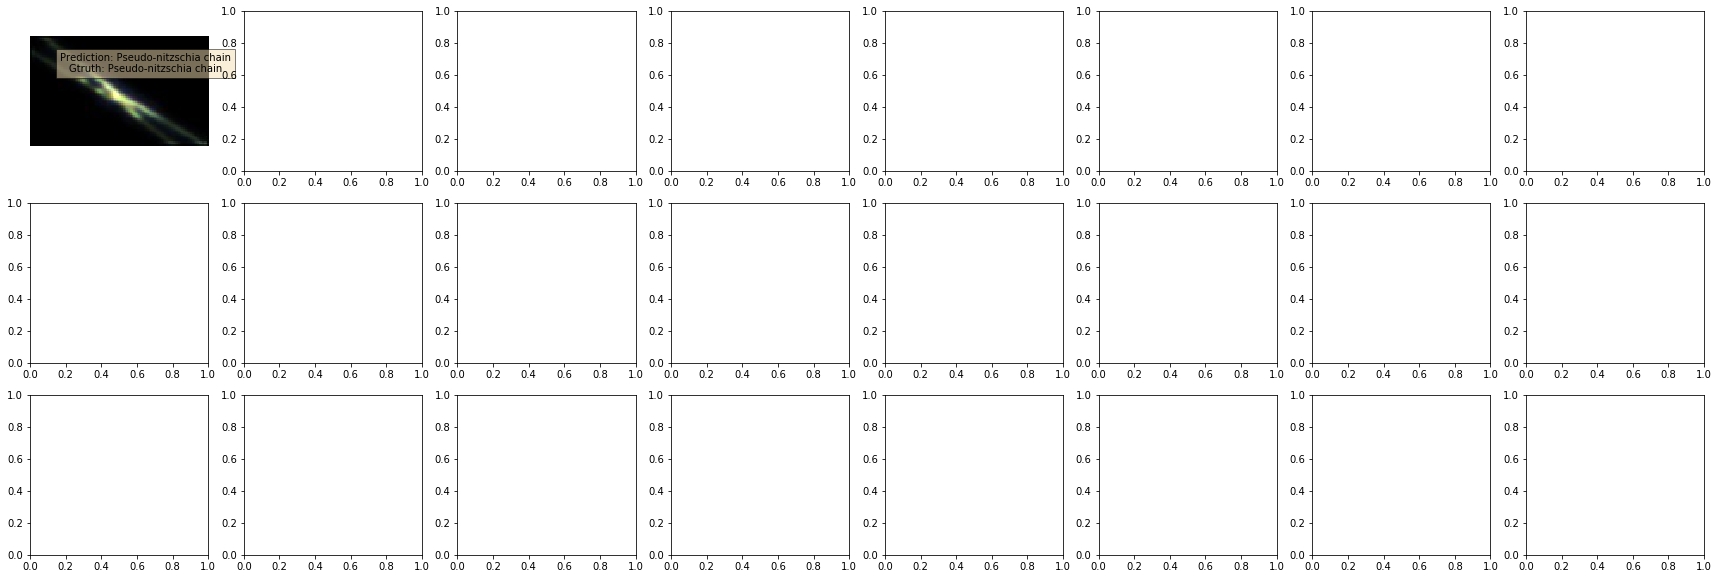


*********************************** detritus ***********************************


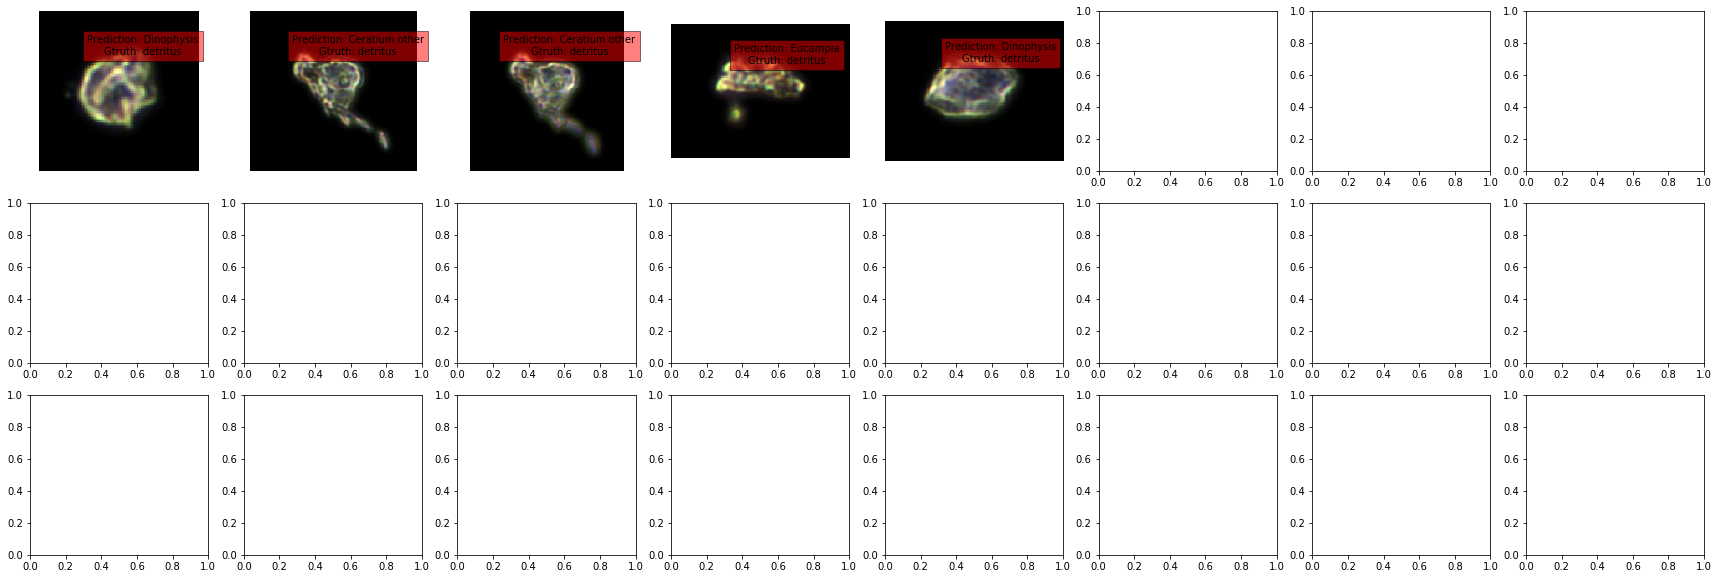


********************************* diatom chain *********************************


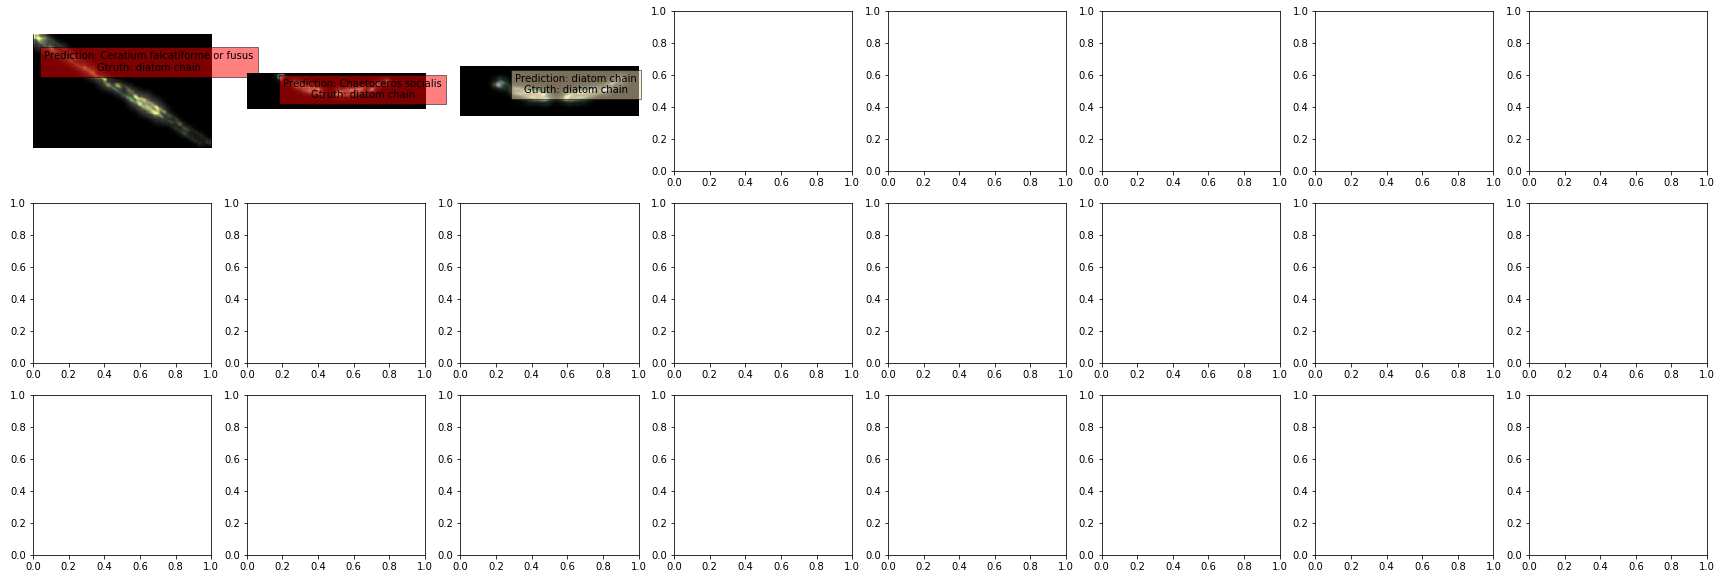

In [90]:
report.show_misclassifications()

# Model Report

Author: **NAME**

Below is a summary to report the model performance and its metadata:
1. Dataset Statistics
2. Model Selection and Training Scheme
3. Model Performance
4. Image Analysis


## Dataset Statistics

In [14]:
printmd('## Dataset Statistics: ');
printmd('Partitioning: 50% Train | 50% Val');
report.show_dataset_statistics()

## Dataset Statistics: 

Partitioning: 50% Train | 50% Val


*********************************** Dataset ************************************
Idx. Cls					TrainImageCount		ValImageCount
 1. Acantharea                                           845		  846
 2. Akashiwo                                             794		  794
 3. Ceratium falcatiforme or fusus                       765		  765
 4. Ceratium furca                                       595		  595
 5. Ceratium other                                       569		  570
 6. Chaetoceros socialis                                 412		  413
 7. Chattonella                                          405		  406
 8. Ciliates                                             366		  366
 9. Cochlodinium                                         326		  327
10. Dinophysis                                           321		  321
11. Eucampia                                             308		  308
12. Gyrodinium                                           307		  307
13. Lingulodinium polyedra                               2

## Model Selection & Training Scheme 

Model: Pretrained ResNet 50 (13 conv layers freezed)

* **Number Epochs**: 45 epochs
* **Learning Rate**: 0.001
* **Batch size**: 12 or 16
* **Optimizer**: Adam Optimizer

Data augmentation
* **Rescaling**: 224x224
* **Center cropping**
* **Random affinement**

Additional Notes:


### Train/Val Loss: 

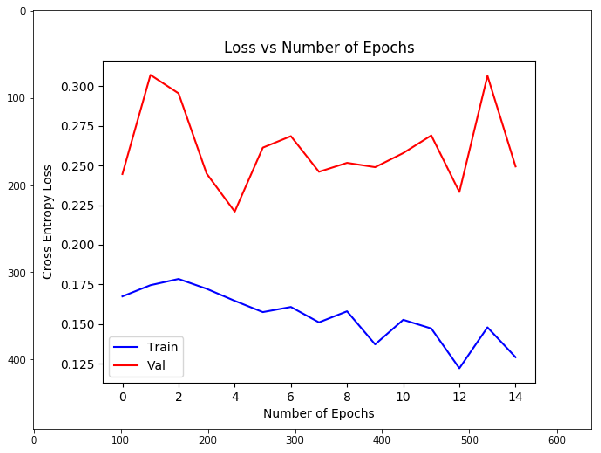

In [25]:
printmd('### Train/Val Loss: '); report.show_loss_graph()

### Train/Val Acc: 

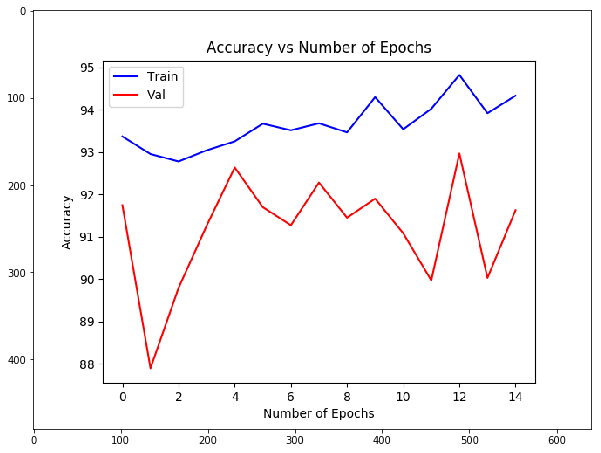

In [26]:
printmd('### Train/Val Acc: '); report.show_acc_graph()

### Validation Matrix

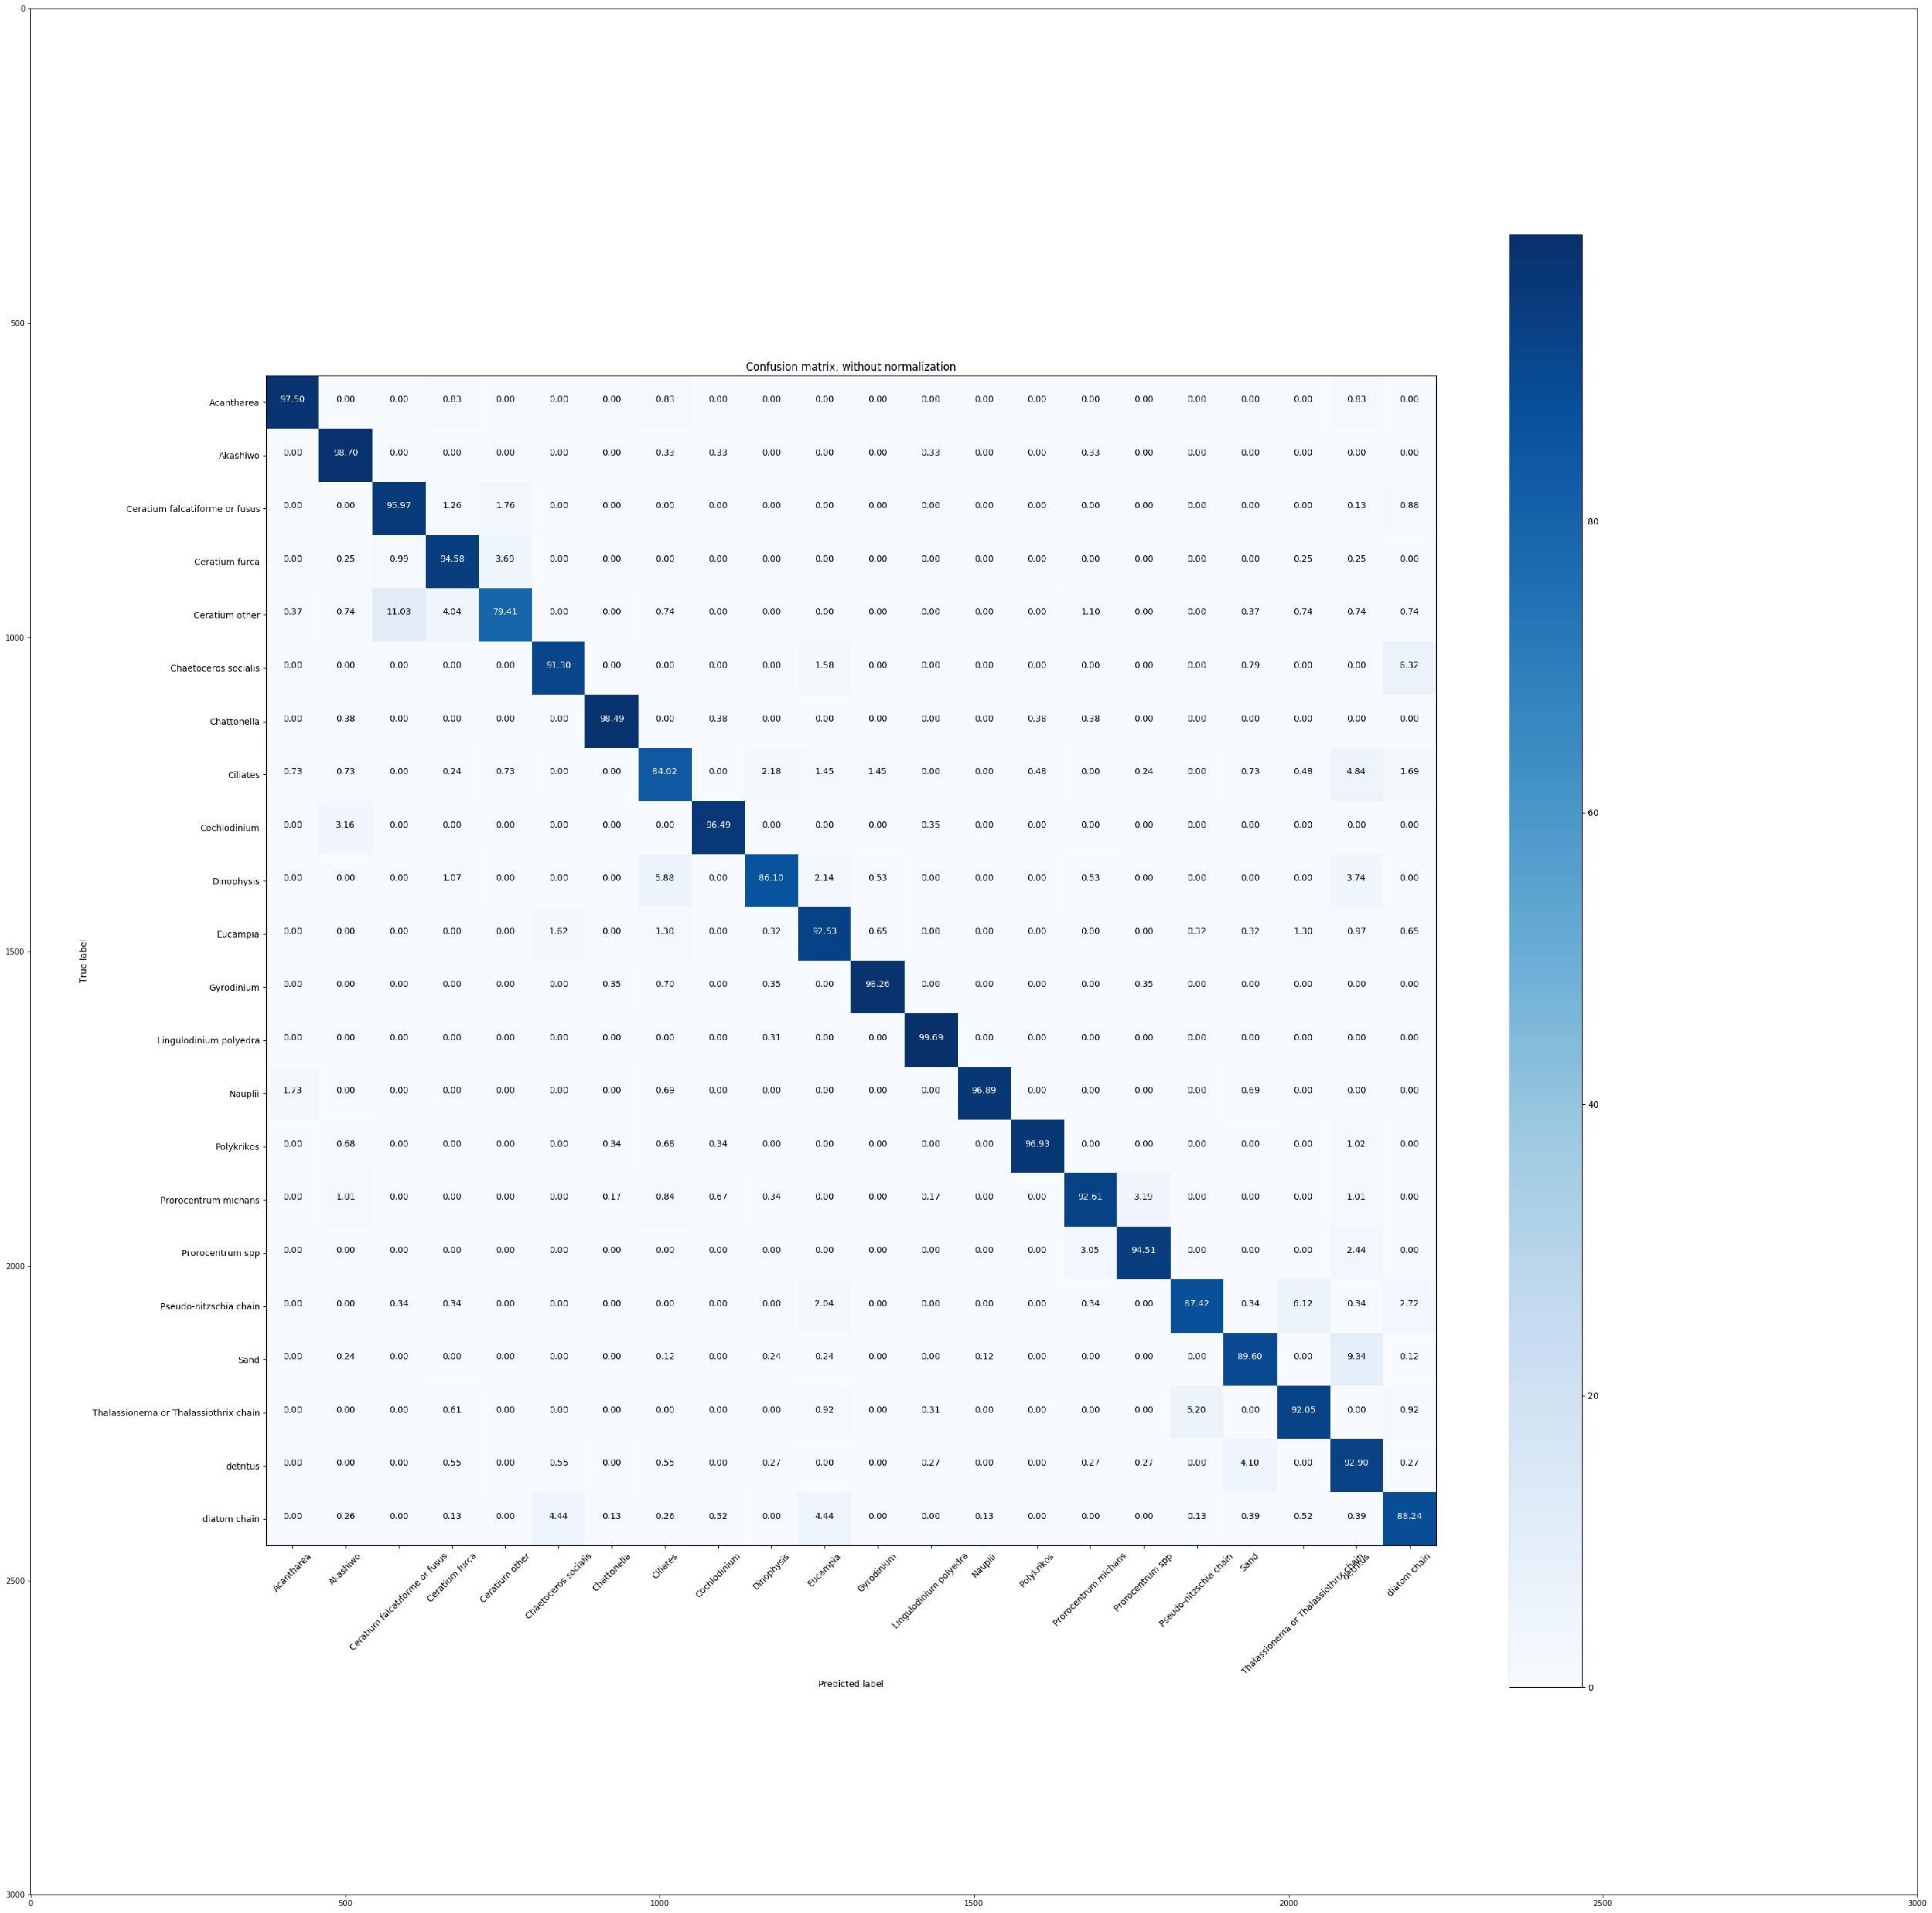

In [27]:
printmd('### Validation Matrix'); report.show_val_confusion_matrix()

### Prediction Statistics


********************************* Predictions **********************************
Idx. Cls						Gtruth		Predictions
 1. Akashiwo                                               2		    0
 2. Ciliates                                              18		   17
 3. Cochlodinium                                           1		    0
 4. Gyrodinium                                             9		    4
 5. Polykrikos                                             2		    1
 6. Prorocentrum michans                                   6		    1
 7. Prorocentrum spp                                       2		    2
 8. Pseudo-nitzschia chain                                 1		    1
 9. detritus                                               5		    2
10. diatom chain                                           3		    1


### Accuracy is 44.89795918367347%

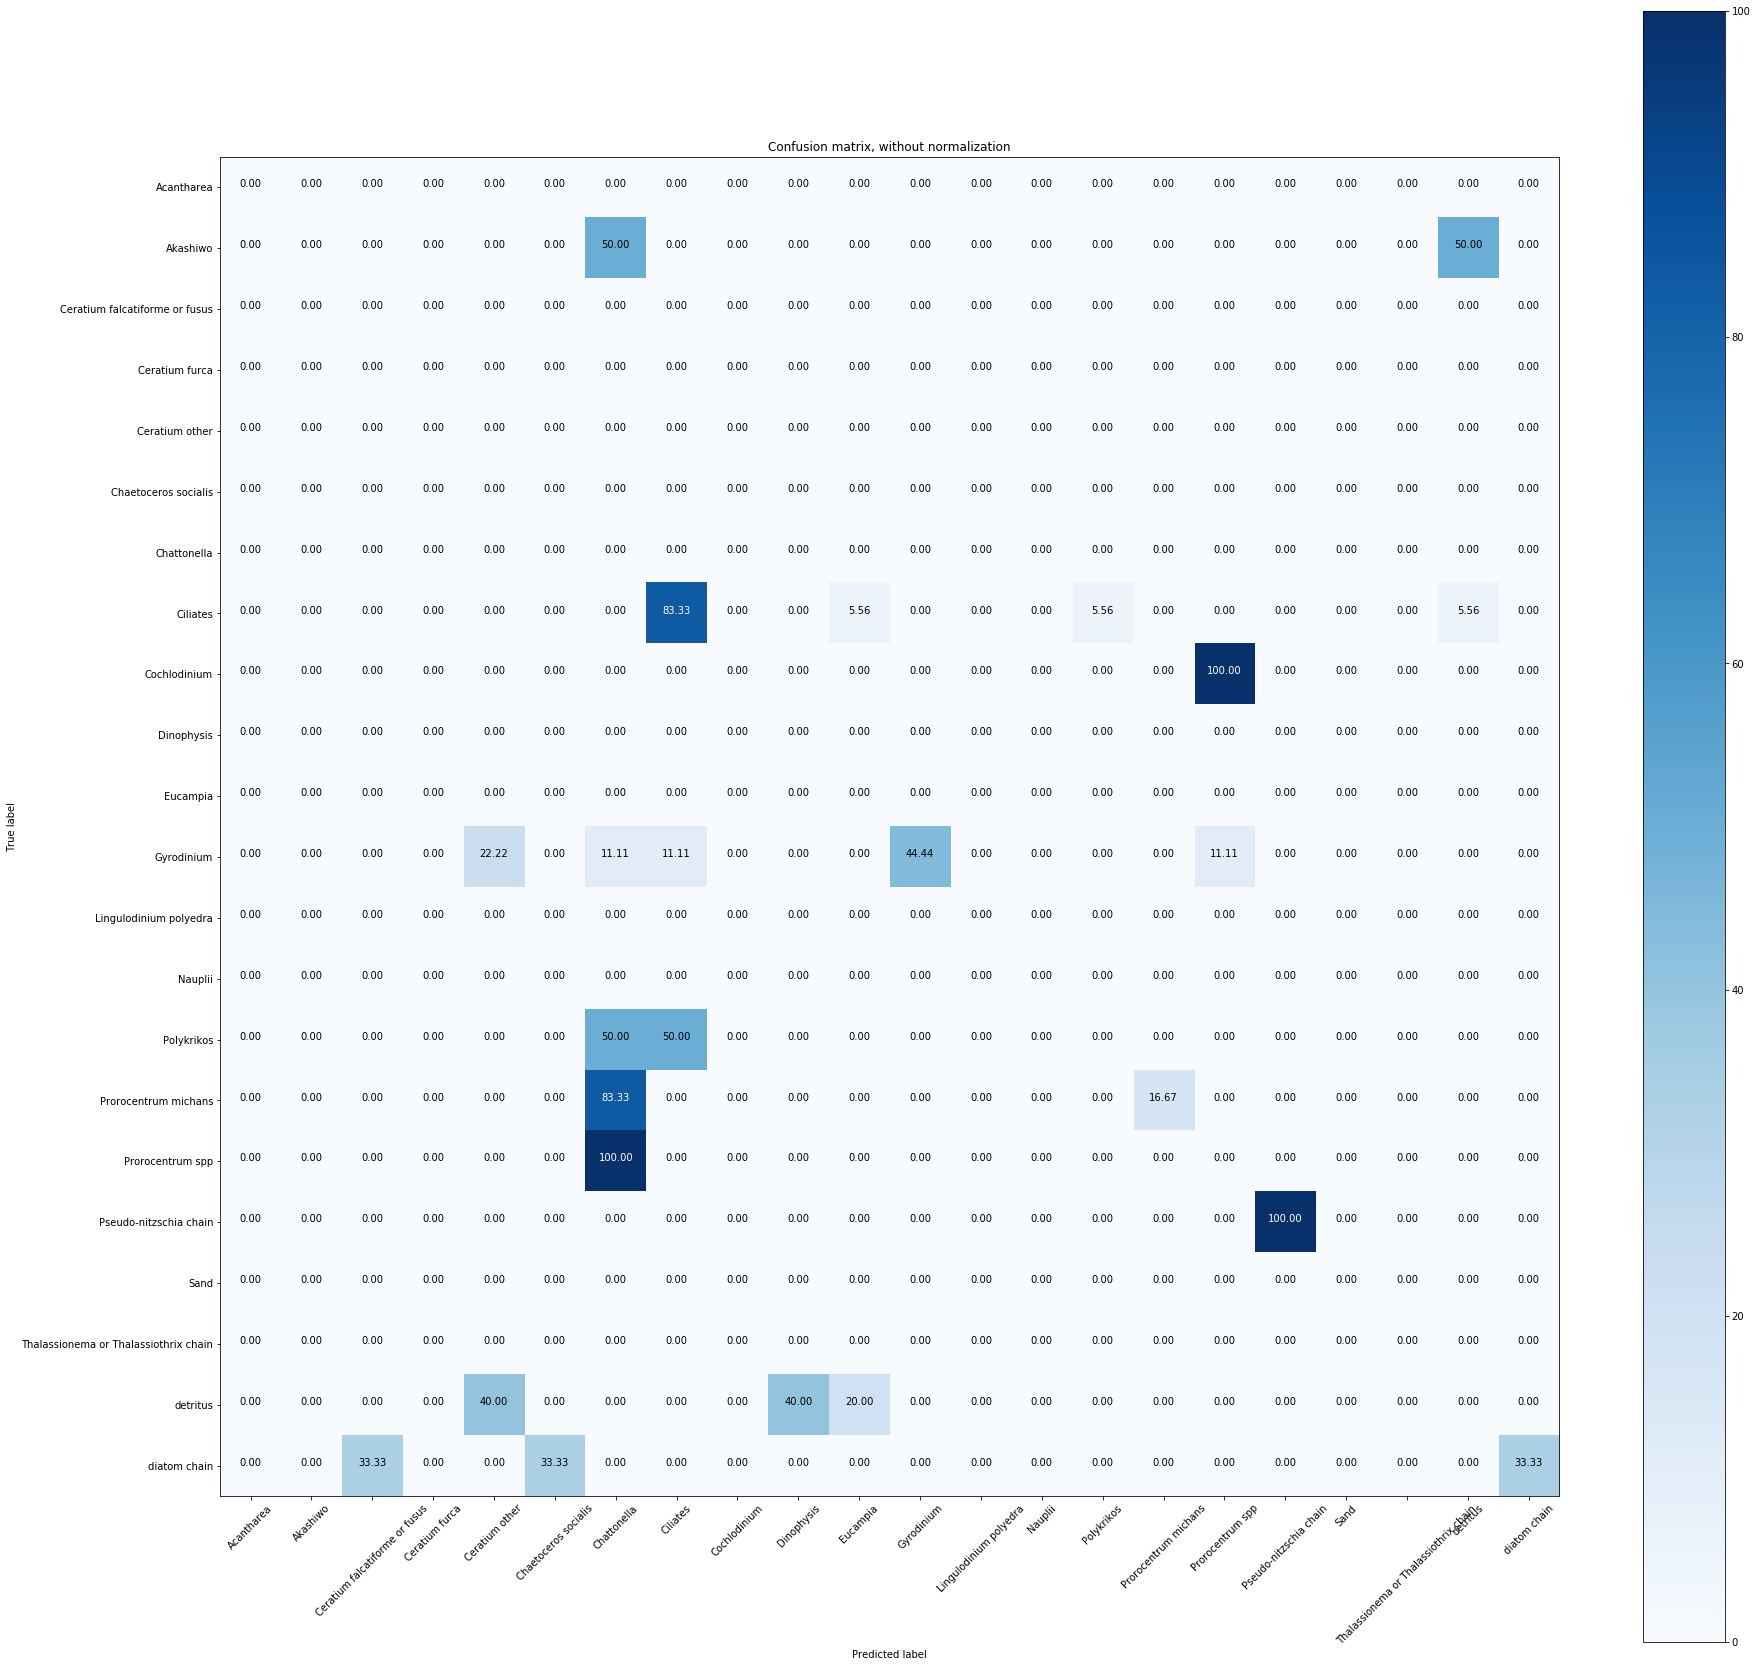

In [13]:
printmd('### Prediction Statistics'); report.show_prediction_statistics()
acc, _ = report.get_acc()
printmd('### '+'Accuracy is {}%'.format(acc*100))
report.show_confusion_matrix()